# CIVL 300 - Homework 4

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd

# Problem 3

In [2]:
# CONSTANTS
TC_subbase = 174000 # $
TC_HMA = 828000 # $
dailyLabor = 1320 # $/day
dailyEquipment = 500 # $/day
VC_daily = dailyLabor + dailyEquipment # 1820 $/day
volumeSubbase = 12000
volumeHMA = 6000

In [3]:
def daySim(volumeCap, lowB, highB):
    accumulator = 0
    dayCount = 0
    while accumulator < volumeCap:
        rand_volume = np.random.uniform(lowB, highB)
        if (rand_volume + accumulator >= volumeCap):
            # get fraction of day remaining
            fractionDay = (rand_volume - ((rand_volume + accumulator) % volumeCap))/ rand_volume
            return dayCount + fractionDay
        accumulator += rand_volume
        dayCount += 1

## Sampled Durations (Check)
Check if the sampled durations are realistic.

In [4]:
sampled_durations = []
for _ in range(100000):
    sampled_durations.append(daySim(volumeSubbase, 400, 600))

sampled_durations.sort()

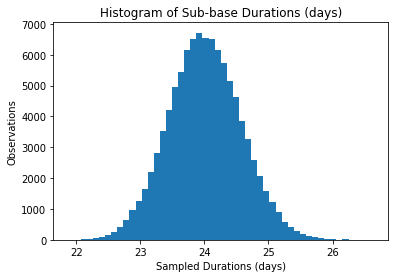

In [5]:
plt.hist(sampled_durations, bins=50)
plt.xlabel("Sampled Durations (days)")
plt.ylabel("Observations")
plt.title("Histogram of Sub-base Durations (days)")
plt.show()

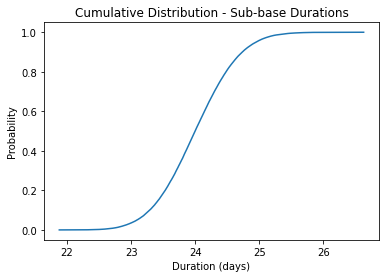

In [6]:
plt.plot(sampled_durations, np.arange(0, 1, 1/len(sampled_durations)))
plt.title("Cumulative Distribution - Sub-base Durations")
plt.xlabel("Duration (days)")
plt.ylabel("Probability")
plt.show()

## Total Cost Simulation
Part B. of problem.

In [7]:
def totalCostSim():
    sampled_costs = []
    for _ in range(100000):
        subbase_duration = daySim(volumeSubbase, 400, 600)
        HMA_duration = daySim(volumeHMA, 315.543, 473.314)
        total_duration = subbase_duration + HMA_duration
        VC_total = VC_daily * total_duration
        TC_total = TC_subbase + TC_HMA + VC_total
        sampled_costs.append(TC_total)
    sampled_costs.sort()
    return sampled_costs, np.arange(0, 1, 1/len(sampled_costs))

In [8]:
xval, yval = totalCostSim()

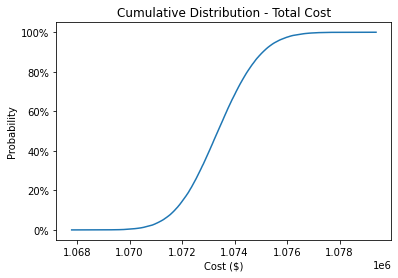

In [9]:
plt.plot(xval, yval)
plt.title("Cumulative Distribution - Total Cost")
plt.ylabel("Probability")
plt.xlabel("Cost ($)")
fig = plt.gcf()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
fig.savefig(f"CumulativeDistribution-TotalCost.png")

## 10% Exceedance of Project Costs
Part C. of problem.

In [10]:
print(f"90% probability the project less than or equal to ${round(np.percentile(xval, 90), 2)}")

90% probability the project less than or equal to $1075076.18


# Problem 4 - A

In [11]:
IC_electric = 1900
VC_electric = 1.15 # $/hour
main_electric = 400 # $/year
salv_electric = -500 # $

IC_gas = 600 # $
VC_gas = 0.45 + 1.45 # $/hour
main_gas = 0 # $/year
salv_gas = 0 # $

# start with 1 hour per day for 4 years to 24 hours per day for 4 years
hoursPerYear = np.arange(0, 8760, 1)

In [12]:
hoursPerYear.size

8760

In [43]:
def getCosts(numYears, yearlyHours, hourlyCost, yearlyCost, addStart, addEnd, discountRate):
    costsPerYear = np.array([])
    # note, years have to have 2 or more values
    for year in range(0, numYears+1):
        netCosts = (hourlyCost * yearlyHours) + yearlyCost
        if year == 0:
            netCosts = addStart
            costsPerYear = np.append(costsPerYear, netCosts)
            continue
        elif year == numYears:
            netCosts += addEnd
        costsPerYear = np.append(costsPerYear, [(netCosts)/(1+discountRate)**year])
    return costsPerYear

In [58]:
getCosts(4, 400, VC_electric, main_electric, IC_electric, salv_electric, 0.09)

array([1900.        ,  788.99082569,  723.84479421,  664.07779285,
        255.03307598])

In [47]:
getCosts(4, 400, VC_gas, main_gas, IC_gas, salv_gas, 0.09).sum()

3062.187106560562

In [48]:
def hoursSim(numYears, hoursArr, hourlyCost, yearlyCost, addStart, addEnd, discountRate):
    totalCosts = []
    for hourValue in hoursArr:
        totalCosts.append(getCosts(numYears, hourValue, hourlyCost, yearlyCost, addStart, addEnd, discountRate).sum())
    return np.array(totalCosts)

In [49]:
electricTotalCosts = hoursSim(4, hoursPerYear, VC_electric, main_electric, IC_electric, salv_electric, 0.09)

In [50]:
gasTotalCosts = hoursSim(4, hoursPerYear, VC_gas, main_gas, IC_gas, salv_gas, 0.09)

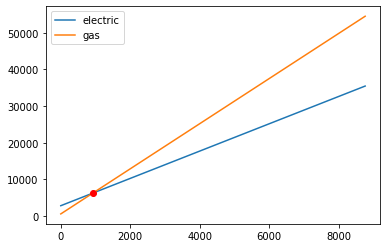

In [51]:
plt.plot(hoursPerYear, electricTotalCosts, label="electric")
plt.plot(hoursPerYear, gasTotalCosts, label="gas")
idx = np.argwhere(np.diff(np.sign(np.array(electricTotalCosts) - np.array(gasTotalCosts)))).flatten()
plt.plot(hoursPerYear[idx], electricTotalCosts[idx], "ro")
plt.legend()
plt.show()

In [59]:
idx[0]

922

In [56]:
getCosts(4, 922, VC_gas, main_gas, IC_gas, salv_gas, 0.09).sum()

6275.341280622095

In [57]:
getCosts(4, 922, VC_electric, main_electric, IC_electric, salv_electric, 0.09).sum()

6276.750330928439

# Problem 4 - B, C

In [22]:
monthlyRate = 0.07/12
initialBalance = [75000,]
n = 60
interest = []
principal = []
endingBalance = []
uniformPayment = 1485.09
for i in range(0, n):
    currInterest = initialBalance[i] * monthlyRate
    currPrincipal = uniformPayment - currInterest
    currEBalance = initialBalance[i] - currPrincipal
    interest.append(currInterest)
    principal.append(currPrincipal)
    endingBalance.append(currEBalance)
    if i != n-1:
        initialBalance.append(currEBalance)

In [23]:
d = {'Initial Balance': initialBalance, 'Interest': interest, "Principal": principal, "Ending Balance": endingBalance}
df = pd.DataFrame(data=d)

In [24]:
df

,Initial Balance,Interest,Principal,Ending Balance
0,75000.000000,437.500000,1047.590000,73952.410000
1,73952.410000,431.389058,1053.700942,72898.709058
2,72898.709058,425.242470,1059.847530,71838.861528
3,71838.861528,419.060026,1066.029974,70772.831553
4,70772.831553,412.841517,1072.248483,69700.583071
5,69700.583071,406.586735,1078.503265,68622.079805
6,68622.079805,400.295466,1084.794534,67537.285271
7,67537.285271,393.967497,1091.122503,66446.162768
8,66446.162768,387.602616,1097.487384,65348.675384
9,65348.675384,381.200606,1103.889394,64244.785991


In [25]:
df.head(30)["Interest"].sum()

10316.137116697468

# Problem 4 - D

In [26]:
data4D = {
    "Year": [i for i in range (0, 10+1)],
    "Cash Flow": [-8e6, -5e6, -1.5e6, 4e6, 5.5e6, 5.5e6, 5.5e6, 5.5e6, 5.5e6, 5.5e6, 5.5e6]
}
df2 = pd.DataFrame(data4D)

In [27]:
df2

,Year,Cash Flow
0,0,-8000000.0
1,1,-5000000.0
2,2,-1500000.0
3,3,4000000.0
4,4,5500000.0
5,5,5500000.0
6,6,5500000.0
7,7,5500000.0
8,8,5500000.0
9,9,5500000.0


In [28]:
V = 18e6 # Principal, V
r = 0.03 # Coupon Rate, r = 3%
marr = 0.05
annualPayment = r*V
annualPayment

540000.0

In [30]:
df2.loc[df2.Year > 0, "Cash Flow"] = df2.loc[df2.Year > 0, "Cash Flow"].apply(lambda x: x-annualPayment)

In [31]:
df2

,Year,Cash Flow
0,0,-8000000.0
1,1,-5540000.0
2,2,-2040000.0
3,3,3460000.0
4,4,4960000.0
5,5,4960000.0
6,6,4960000.0
7,7,4960000.0
8,8,4960000.0
9,9,4960000.0


In [32]:
# add 18mil, subtract issuing fee of 1% of principal
df2.loc[0, "Cash Flow"] += (-0.01*V + 18e6)
# subtract principal from final year
df2.loc[10, "Cash Flow"] += -1*V

In [35]:
df2["Cash Flow (PV)"] = df2.apply(lambda rows: rows["Cash Flow"]/(1+marr)**rows["Year"], axis=1)

In [37]:
df2["Cash Flow (PV)"].sum()

19424403.938019436

In [39]:
df2

,Year,Cash Flow,Cash Flow (PV)
0,0,9820000.0,9.820000e+06
1,1,-5540000.0,-5.276190e+06
2,2,-2040000.0,-1.850340e+06
3,3,3460000.0,2.988878e+06
4,4,4960000.0,4.080604e+06
5,5,4960000.0,3.886290e+06
6,6,4960000.0,3.701228e+06
7,7,4960000.0,3.524979e+06
8,8,4960000.0,3.357123e+06
9,9,4960000.0,3.197260e+06
